In [1]:
import sys
import importlib
import datetime

import numpy as np
import pandas as pd
import xarray as xr
import pvlib as pv
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import scipy.ndimage.filters as filters
from distributed import LocalCluster, Client

In [2]:
%matplotlib notebook

In [3]:
sys.path.append('/home/travis/python_code/letkf_forecasting/')
import letkf_forecasting as lf
import prepare_sat_data as prep
import random_functions as rf
import interpolate_data as tmh_id

In [4]:
cloudy_month = 4
cloudy_day = 15
clear_month = 4
clear_day = 14

In [6]:
## clear day
year = 2014
month = clear_month
day = clear_day
solar_noon = pd.Timestamp('12:30:00')
solar_noon = solar_noon.replace(year=year, month=month, day=day)
step = pd.Timedelta('3h')
start = solar_noon - step
start = (start - pd.Timedelta('7.5min')).round(freq='15min')
end = solar_noon + step
end = (end + pd.Timedelta('7.5min')).round(freq='15min')
clear_times = pd.date_range(start, end, freq='15min').tz_localize('MST')
print(clear_times)

DatetimeIndex(['2014-05-04 09:30:00-07:00', '2014-05-04 09:45:00-07:00',
               '2014-05-04 10:00:00-07:00', '2014-05-04 10:15:00-07:00',
               '2014-05-04 10:30:00-07:00', '2014-05-04 10:45:00-07:00',
               '2014-05-04 11:00:00-07:00', '2014-05-04 11:15:00-07:00',
               '2014-05-04 11:30:00-07:00', '2014-05-04 11:45:00-07:00',
               '2014-05-04 12:00:00-07:00', '2014-05-04 12:15:00-07:00',
               '2014-05-04 12:30:00-07:00', '2014-05-04 12:45:00-07:00',
               '2014-05-04 13:00:00-07:00', '2014-05-04 13:15:00-07:00',
               '2014-05-04 13:30:00-07:00', '2014-05-04 13:45:00-07:00',
               '2014-05-04 14:00:00-07:00', '2014-05-04 14:15:00-07:00',
               '2014-05-04 14:30:00-07:00', '2014-05-04 14:45:00-07:00',
               '2014-05-04 15:00:00-07:00', '2014-05-04 15:15:00-07:00',
               '2014-05-04 15:30:00-07:00'],
              dtype='datetime64[ns, MST]', freq='15T')


In [7]:
## cloudy day
year = 2014
month = cloudy_month
day = cloudy_day
solar_noon = pd.Timestamp('12:30:00')
solar_noon = solar_noon.replace(year=year, month=month, day=day)
step = pd.Timedelta('3h')
start = solar_noon - step
start = (start - pd.Timedelta('7.5min')).round(freq='15min')
end = solar_noon + step
end = (end + pd.Timedelta('7.5min')).round(freq='15min')
cloudy_times = pd.date_range(start, end, freq='15min').tz_localize('MST')
print(cloudy_times)

DatetimeIndex(['2014-05-06 09:30:00-07:00', '2014-05-06 09:45:00-07:00',
               '2014-05-06 10:00:00-07:00', '2014-05-06 10:15:00-07:00',
               '2014-05-06 10:30:00-07:00', '2014-05-06 10:45:00-07:00',
               '2014-05-06 11:00:00-07:00', '2014-05-06 11:15:00-07:00',
               '2014-05-06 11:30:00-07:00', '2014-05-06 11:45:00-07:00',
               '2014-05-06 12:00:00-07:00', '2014-05-06 12:15:00-07:00',
               '2014-05-06 12:30:00-07:00', '2014-05-06 12:45:00-07:00',
               '2014-05-06 13:00:00-07:00', '2014-05-06 13:15:00-07:00',
               '2014-05-06 13:30:00-07:00', '2014-05-06 13:45:00-07:00',
               '2014-05-06 14:00:00-07:00', '2014-05-06 14:15:00-07:00',
               '2014-05-06 14:30:00-07:00', '2014-05-06 14:45:00-07:00',
               '2014-05-06 15:00:00-07:00', '2014-05-06 15:15:00-07:00',
               '2014-05-06 15:30:00-07:00'],
              dtype='datetime64[ns, MST]', freq='15T')


In [18]:
importlib.reload(tmh_id)
load_path = './data/'
save_path = './data/'
tmh_id.interp_sat(cloudy_times=cloudy_times,
                  clear_times=clear_times,
                  dx=.25, load_path=load_path, save_path=save_path)

In [8]:
suffix = '_' + str(cloudy_month) + '_' + str(cloudy_day)
load_path = './data/for' + suffix + '/' + '{var_name}' + suffix + '{extension}'
csi = pd.read_hdf(load_path.format(var_name='csi', extension='.h5'))
shape = np.load(load_path.format(var_name='domain_shape', extension='.npy'))
x = np.load(load_path.format(var_name='x', extension='.npy'))
y = np.load(load_path.format(var_name='y', extension='.npy'))

FileNotFoundError: File ./data/for_5_6/csi_5_6.h5 does not exist

<IPython.core.display.Javascript object>


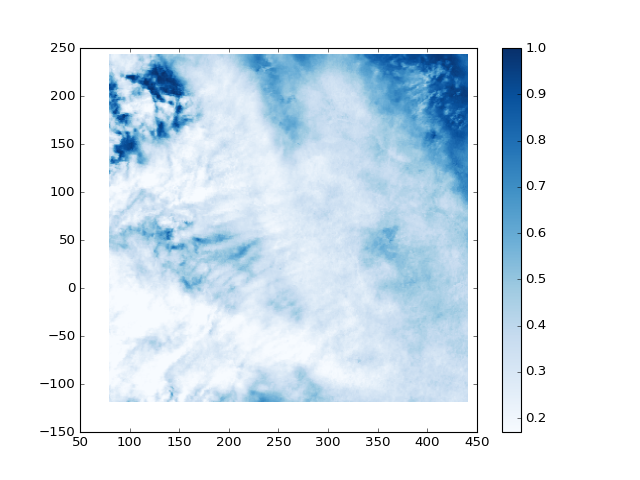

/home/travis/miniconda3/envs/py35Solar/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


<IPython.core.display.Javascript object>


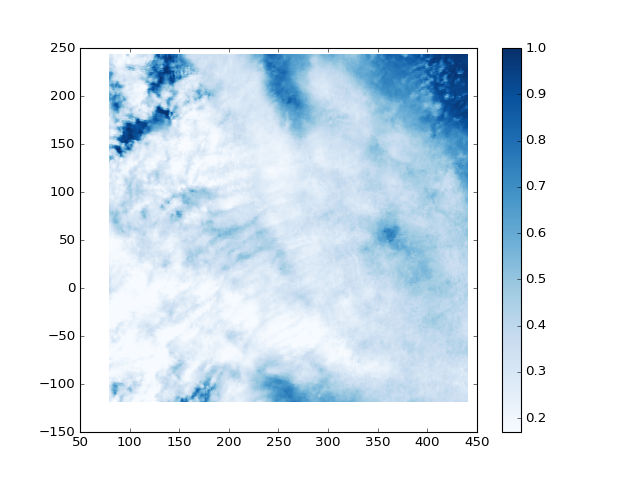

<IPython.core.display.Javascript object>


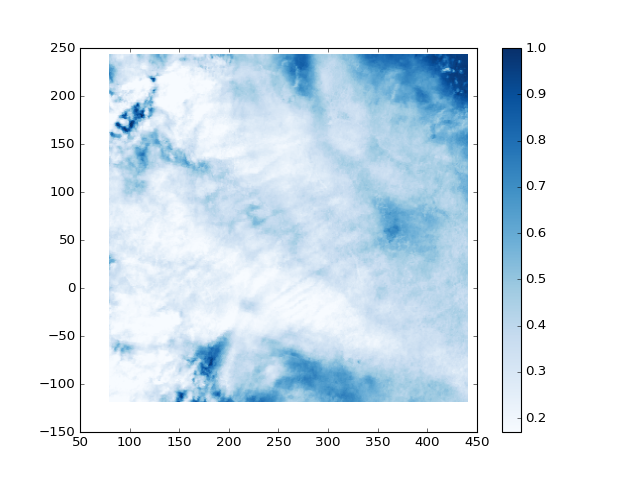

<IPython.core.display.Javascript object>


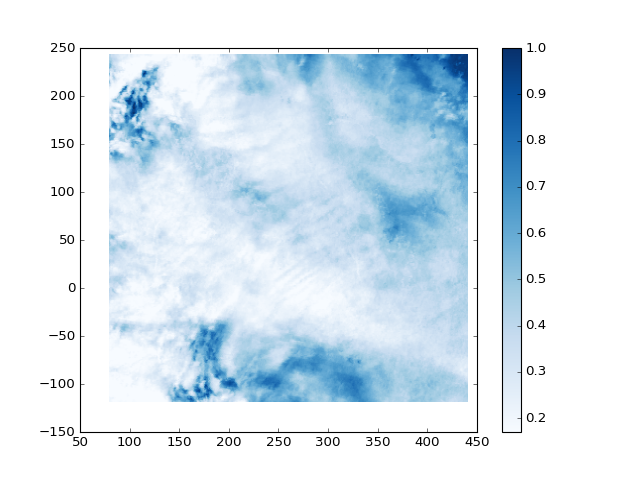

<IPython.core.display.Javascript object>


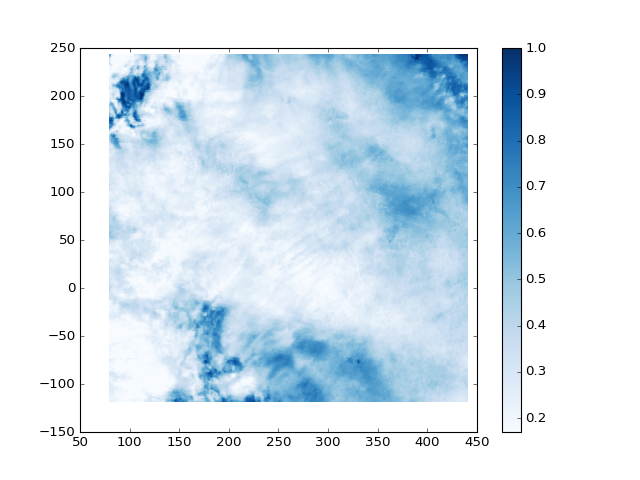

In [32]:
for t in np.arange(5):
    plt.figure()
    im = plt.pcolormesh(x, y, csi.iloc[t].reshape(shape), cmap='Blues')
    plt.colorbar(im)

In [44]:
importlib.reload(tmh_id)
save_path='./data/'
date = cloudy_times[0]
tmh_id.interp_wind(save_path=save_path, date=date)

In [46]:
suffix = '_' + str(cloudy_month) + '_' + str(cloudy_day)
load_path = './data/for' + suffix + '/' + '{var}'
U = pd.read_hdf(load_path.format(var='U.h5'))
U_shape = np.load(load_path.format(var='U_shape.npy'))
x = np.load(load_path.format(var='x.npy'))
y = np.load(load_path.format(var='y.npy'))

In [1]:
for t in np.arange(5):
    plt.figure()
    im = plt.pcolormesh(x, y, U.iloc[t].reshape(U_shape)[:, 1:], cmap='Greys')
    plt.colorbar(im)

NameError: name 'np' is not defined